# Differential Expression Analysis
## Here is a script to perform differential expression analysis
 
-  This is a way to measure expression of a panel of genes after perturbing somethign in the cell for this analysis the perterbation is the knockdown of a particular RNA-binding protein using shRNA.
 
- The resulting change in gene expression is determined by comparing transcript levels of cells that have not had the RNA-binding protein knocked down (the control)

- There are some somewhat complicated statistics going on here that are performed by the DESeq2 package you can learn more about these statistic and Differential Expression analysis here (don't let the math scare you, you just need to understand the gist of what the p-values we obtain are):

http://data-science-sequencing.github.io/Win2018/lectures/lecture15/


More info on DESeq R package:

http://bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html
       

# Install required libraries/packages

In [100]:

if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install("DESeq2")
install.packages("DESeq2",force = TRUE)
install.packages('gridExtra') 
install.packages('yaml')
# Load required libraries/packages
library(gridExtra)
library(yaml)
library( "DESeq2" ) 
# browseVignettes("DESeq2") # running this should open a help page to give info about DESeq2 Package






# Load in your data 

**NOTE**: you will need to change the name of **filePath** to whereever you store your RNA-seq files

**NOTE**: you will need to change the name of **dataFile** to whatever data you are using *(it is the name of the file without ".tsv" and without "_combined-tpms" and without "_metadata")*
- Possible values for dataFile given the dataset provided:
    - 'SERBP1_ENCSR820ROH'
    - 'SUB1_ENCSR997FOT'
    - 'UBE2L3_ENCSR424JSU'
    - 'NUP35_ENCSR457WBK'
    - 'SRSF1_ENCSR094KBY'
    - 'GRWD1_ENCSR850FEH'
    - 'XRCC6_ENCSR500WHE'
    - 'SRSF3_ENCSR376FGR'
    - 'PABPC1_ENCSR910YNJ'
    - 'DDX19B_ENCSR312SFA'






In [170]:
filePath <- "/Users/rbp_rna-seq/data" ## UPDATE to desired value
dataFile <- "SERBP1_ENCSR820ROH" ## UPDATE to desired value 


countDataFile <- paste(paste(filePath,dataFile,sep=""),'_combined-tpms.tsv',sep="")
metaDataFile <-paste(paste(filePath,dataFile,sep=""),'_metadata.tsv',sep="")

# countData contains all of the transcripts (along the left side in column "ensgene") and their corresponding  transcript per million counts (TPM) for each of the experiments (each coumn - usually start with "ENCF...")
countData <- read.csv(countDataFile, header = TRUE, sep = "\t")
head(countData)

# metaData contains information about the experiments in countData, so we can tell if a particular column is a control or is the result of knockdown of the given gene
#    "id" column corresponds with the column names in countData
#    "dex" indicates the particular treatment
#          if the value in this column is not control, it is the name of the gene knocked down for the experiment
#          if value is control, no gene was knocked down
metaData <- read.csv(metaDataFile, header = TRUE, sep = "\t")
head(metaData)



ensgene,ENCFF719GNU,ENCFF997KRK,ENCFF399GRJ,ENCFF083UHP,ENCFF341PZX,ENCFF081DZU,ENCFF476JID,ENCFF288CXC
ENST00000361851,125865,129707,127427,128373,67678,63471,70237,61634
ENST00000361739,50603,49905,49985,50529,27186,30256,27191,30224
ENST00000361335,42880,43530,43495,42901,26860,27176,26906,27102
ENST00000361624,41887,40365,40496,41764,34006,33509,33949,33519
ENST00000362079,37530,36530,36503,37551,22508,22932,22564,22854
ENST00000361899,32614,26887,31488,27908,20270,18023,17725,20684


id,dex
ENCFF719GNU,SERBP1
ENCFF997KRK,SERBP1
ENCFF399GRJ,SERBP1
ENCFF083UHP,SERBP1
ENCFF341PZX,control
ENCFF081DZU,control


# Constructs a DEseqDataSet object 
## using the countData and metaData 
     
 - **countData**: the data with transcript counts in TPMs (here it will be set to the countData dataframe, these are not the same variables)

 - **colData**: the information about how the experiment was set up

 - **design**: treatment status (control or cells treated to knock down gene expression)

 - **tidy**: tells DESeq2 how to output the results

In [171]:

dds <- DESeqDataSetFromMatrix(countData=countData, 
                              colData=metaData, 
                              design=~dex, tidy = TRUE)

# Run differential expression analysis on the data
dds <- DESeq(dds)

#?DESeq # running this will pop up a help window with information about DESeq like the methods and such

# Pull the results from the differential expresison analysis
res <- results(dds)

# Look at results table
head(results(dds, tidy=TRUE)) 

# View a summary of the results
summary(res) 

# Sort summary list by p-value
res <- res[order(res$padj),]
head(res)


  it appears that the last variable in the design formula, 'dex',
  has a factor level, 'control', which is not the reference level. we recommend
  to use factor(...,levels=...) or relevel() to set this as the reference level
  before proceeding. for more information, please see the 'Note on factor levels'
  in vignette('DESeq2').
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENST00000361851,101393.33,-1.3669533,0.10793193,-12.664958,0.000000000000000000000000000000000000924701562998404854929060418826,0.00000000000000000000000000000000200354376345969773410687788924
ENST00000361739,41089.94,-1.2160645,0.10273582,-11.836811,0.000000000000000000000000000000025184828283800800714690965054867054,0.00000000000000000000000000003733584517209563592911158437367662
ENST00000361335,36324.05,-1.0855946,0.06649806,-16.325209,0.000000000000000000000000000000000000000000000000000000000006531667,0.00000000000000000000000000000000000000000000000000000009198874
ENST00000361624,38045.75,-0.6937192,0.08209175,-8.450534,0.000000000000000028997277613853089672466971028195796686938035392582,0.00000000000001737800677764680891874465798494508355834632998271
ENST00000362079,30949.55,-1.1133831,0.07796748,-14.280095,0.000000000000000000000000000000000000000000000291204887337732016188,0.00000000000000000000000000000000000000000164047361232837950977
ENST00000361899,25249.71,-1.0406607,0.15523473,-6.703788,0.000000000020308476898186576288621844328218923186879507625235419255,0.00000000560812616461981613430295203490474897911610696610296145



out of 49579 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 611, 1.2%
LFC < 0 (down)     : 888, 1.8%
outliers [1]       : 5, 0.01%
low counts [2]     : 21407, 43%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



log2 fold change (MLE): dex control vs SERBP1 
Wald test p-value: dex control vs SERBP1 
DataFrame with 6 rows and 6 columns
                        baseMean    log2FoldChange              lfcSE
                       <numeric>         <numeric>          <numeric>
ENST00000472846   1061.447879929 -7.61611133913995  0.290843410503085
ENST00000361335 36324.0511495688 -1.08559464599373 0.0664980551339892
ENST00000361789  6812.4755706567 -1.28778682953014 0.0796100699687595
ENST00000407445 410.503197300656 -4.19665840675009  0.278961034944735
ENST00000362079 30949.5533926236 -1.11338307981834 0.0779674849897061
ENST00000278222  177.75295092858 -2.65607787115659  0.190479227671909
                             stat
                        <numeric>
ENST00000472846 -26.1862949755885
ENST00000361335 -16.3252089674853
ENST00000361789   -16.17618009927
ENST00000407445 -15.0438874288715
ENST00000362079 -14.2800948365249
ENST00000278222 -13.9441864796489
                                           

# Save the output of the differential expression analysis to a file 
This will allow you to analyze it later without needing to re-run the analysis, which takes time


**NOTE**: currently this uses the coundDataFile variable to set the file name, it changes it slightly (replaces "-tpms" and adds "_DE-results" *- DE stands for differential expression*) but you may want to change this to suit your needs)

- If you do not update this, it will output your data into the same folder where your input data are stored


In [167]:
countDataDEOutputFile <- str_replace(coundDataFile, "-tpms.tsv", "_DE-results.csv")
write.csv(x = res, file = countDataDEOutputFile)
# print("Differential expression analysis results written to:")
# print(countDataDEOutputFile)


# Plot Volcano Plot
- These are really useful plots to visualize gene expression differences between to datasets, in this case we are comparing control cells to those that have been treated to knock down a specific gene. 

- Each point represents a single transcript (mRNA) and where that point falls in the plot indicates how greatly the particular perturbation (gene knockdown) impacted the transcript's expression. 

- Points that fall farther from the origin (0,0) undergo greater change in expression. 

- The axes are log'ed because this allows us to more easily see values in the same plot, but be sure to know what the actual values are (try computing log10(100) and compare it to log10(150)) the difference between points falling at those values is different from points that were just 50 apart.

- Transcripts falling on points with negative log2Fold change show a decrease in expression upon perterbation, while those with greater values show an increase in expression

- In the plot below the most interesting genes are those in RED because they undergo the greatest change in expression


You can learn more about volcano plots here:
      https://www.jmp.com/support/downloads/JMPC71_documentation/Content/JMPCUserGuide/GR_C_0034.htm


More information on how to make these plots (and make them look better) can be found here: 

https://training.galaxyproject.org/training-material/topics/transcriptomics/tutorials/rna-seq-viz-with-volcanoplot/tutorial.html


## Things to consider:
1) Try changing the plot size so that everything fits nicely (the y axis right now is a bit large)

2) Try changing the colors of the points, perhaps make the points represnting genes that undergo a decrease in expression a differnt color

3) Depending on the dataset, the cutoffs selected for padj and log2FoldChange might need to be adjusted, you can determine this if you don't see any points that are colored blue or red or if you see too many points colored blue or red


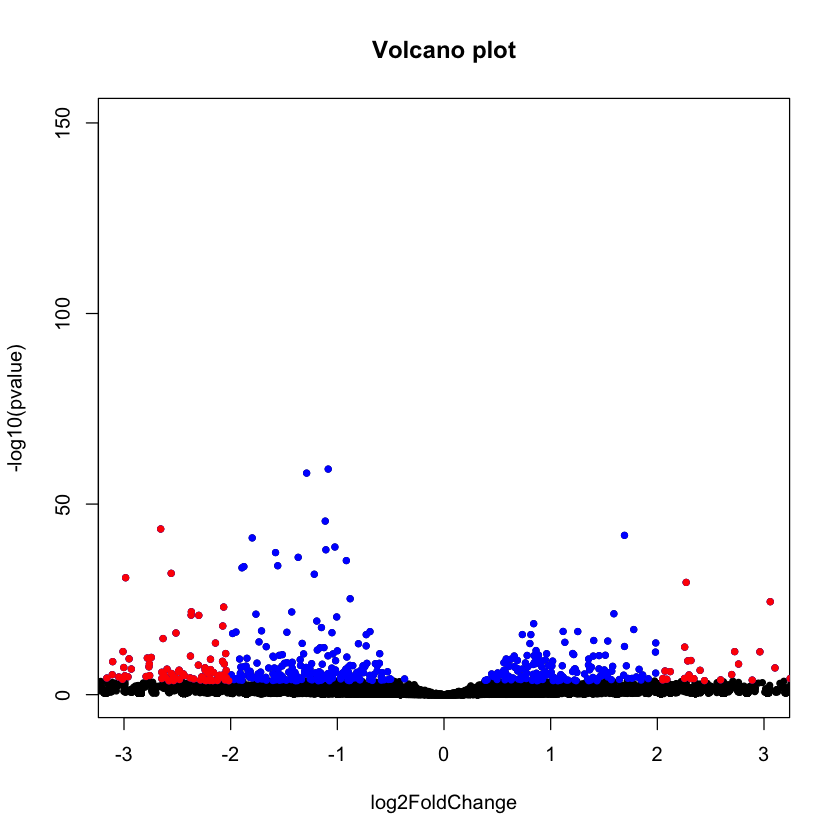

In [172]:
par(mfrow=c(1,1))
with(res, plot(log2FoldChange, -log10(pvalue), pch=20, main="Volcano plot", xlim=c(-3,3)))
# Add colored points: blue if padj<0.01, red if log2FC>1 and padj<0.05)
# The below code just further subsets our results based on significance
# The blue datapoints are those with a p-value less than 0.01
# The red datapoints also have a p-value less than 0.01 but further the log2fold change is even greater
#     Thus the genes represented by the
with(subset(res, padj<.01 ), points(log2FoldChange, -log10(pvalue), pch=20, col="blue"))
with(subset(res, padj<.01 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=20, col="red"))




In [173]:
# Now we want to get information about what these interesting genes actually are
# First we can get their names, which we get by performing a database search in the ENSEMBL database

# we will need the biomart library to perform the search so we load it here
#      NOTE: this make take a few minutes to run
library('biomaRt')
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))

# We need to get the gene names we are interested in, in our dataframe of results (res) these are the rownames 
#      the rownames and can be extracted and placed into the transcript_ids variable by calling transcript_ids <- rownames(res) 
#      HOWEVER we want to further subset this group because the res dataframe is very large and to get our gene names we will be performing
#      a database query over the Internet, so this will take some time, thus if we were to run this with the whole list of genes 
#      it would take VERY LONG
# So instead we subset the data as before like when we were picking the points in the volcano plot to color
#      Here we subset the data to get all of the points we colored red above, but you can change this to whatever you would like
#      being mindful that if the dataset size is long, it will take a long time to look up the names
#      To avoid any issues with this just check the size of your transcript_ids list before running the query search
#          you can do this by calling length(transcript_ids)
transcript_ids <- rownames(subset(res, padj<.01 & abs(log2FoldChange)>2))
transcript_ids

# Now we perform an online database lookup using the biomart library
gene_names <- getBM(attributes = c('ensembl_transcript_id_version', 
                            'ensembl_gene_id', 
                            'external_transcript_name',
                            'external_gene_name'),
             filters = 'ensembl_transcript_id', 
             values = transcript_ids,
             mart = mart,
             useCache = FALSE)
gene_names



[1] "ENST00000472846" "ENST00000407445" "ENST00000278222" "ENST00000402629"
  [5] "ENST00000514786" "ENST00000377050" "ENST00000427924" "ENST00000331523"
  [9] "ENST00000229379" "ENST00000493298" "ENST00000360060" "ENST00000492739"
 [13] "ENST00000474036" "ENST00000532567" "ENST00000556091" "ENST00000313104"
 [17] "ENST00000601008" "ENST00000497902" "ENST00000443816" "ENST00000420536"
 [21] "ENST00000534605" "ENST00000371697" "ENST00000550595" "ENST00000394935"
 [25] "ENST00000541097" "ENST00000485280" "ENST00000513404" "ENST00000579126"
 [29] "ENST00000529492" "ENST00000522445" "ENST00000463074" "ENST00000455150"
 [33] "ENST00000409321" "ENST00000361219" "ENST00000606420" "ENST00000519184"
 [37] "ENST00000468832" "ENST00000553548" "ENST00000591597" "ENST00000506312"
 [41] "ENST00000440114" "ENST00000512145" "ENST00000549259" "ENST00000456319"
 [45] "ENST00000339091" "ENST00000549258" "ENST00000578522" "ENST00000384323"
 [49] "ENST00000474626" "ENST00000519622" "ENST00000460405" "ENST00000565723"
 [53] "ENST00000596417" "ENST00000518677" "ENST00000359579" "ENST00000570856"
 [57] "ENST00000552870" "ENST00000557054" "ENST00000415933" "ENST00000439274"
 [61] "ENST00000502498" "ENST00000391918" "ENST00000582946" "ENST00000418714"
 [65] "ENST00000479414" "ENST00000222304" "ENST00000431950" "ENST00000494446"
 [69] "ENST00000471737" "ENST00000579665" "ENST00000503168" "ENST00000369636"
 [73] "ENST00000526494" "ENST00000336984" "ENST00000287611" "ENST00000296695"
 [77] "ENST00000370990" "ENST00000568864" "ENST00000578044" "ENST00000534246"
 [81] "ENST00000373292" "ENST00000497741" "ENST00000460904" "ENST00000508780"
 [85] "ENST00000567376" "ENST00000358537" "ENST00000581319" "ENST00000586760"
 [89] "ENST00000520280" "ENST00000521790" "ENST00000325568" "ENST00000419968"
 [93] "ENST00000493348" "ENST00000549061" "ENST00000359282" "ENST00000430077"
 [97] "ENST00000512328" "ENST00000558745" "ENST00000576674" "ENST00000468010"
[101] "ENST00000367888" "ENST00000462205" "ENST00000590406" "ENST00000512772"
[105] "ENST00000493592" "ENST00000445874" "ENST00000486298" "ENST00000265023"
[109] "ENST00000480961" "ENST00000567958" "ENST00000443501" "ENST00000335698"
[113] "ENST00000559176" "ENST00000583564" "ENST00000547986" "ENST00000600654"
[117] "ENST00000414186" "ENST00000551570" "ENST00000536823" "ENST00000551620"
[121] "ENST00000529307" "ENST00000550920" "ENST00000299335" "ENST00000509589"
[125] "ENST00000476111" "ENST00000368304" "ENST00000593021" "ENST00000490996"
[129] "ENST00000373092" "ENST00000595227" "ENST00000329697" "ENST00000496684"
[133] "ENST00000548652" "ENST00000483258" "ENST00000481273" "ENST00000471238"
[137] "ENST00000508076" "ENST00000588507" "ENST00000604184" "ENST00000597453"
[141] "ENST00000530702" "ENST00000258962" "ENST00000601439" "ENST00000522293"
[145] "ENST00000599362" "ENST00000367609" "ENST00000486468" "ENST00000230173"
[149] "ENST00000368877" "ENST00000471482" "ENST00000419493" "ENST00000476842"
[153] "ENST00000492227" "ENST00000588633" "ENST00000340687" "ENST00000409292"
[157] "ENST00000583419" "ENST00000476587" "ENST00000587376" "ENST00000367208"
[161] "ENST00000359462" "ENST00000580287" "ENST00000518458" "ENST00000564855"
[165] "ENST00000489100" "ENST00000471649" "ENST00000483282" "ENST00000491202"
[169] "ENST00000228140" "ENST00000415969" "ENST00000396890" "ENST00000267169"
[173] "ENST00000342555" "ENST00000455726" "ENST00000259407" "ENST00000589735"
[177] "ENST00000336374" "ENST00000436754" "ENST00000471036" "ENST00000453759"
[181] "ENST00000555630" "ENST00000553182" "ENST00000503715" "ENST00000549213"
[185] "ENST00000601274" "ENST00000395120" "ENST00000399614" "ENST00000555810"
[189] "ENST00000426650" "ENST00000433556" "ENST00000552097" "ENST00000498660"
[193] "ENST00000370870" "ENST00000574323" "ENST00000512690" "ENST00000398422"
[197] "ENST00000296327" "ENST00000553417" "ENST00000520682" "ENST00000455407"
[201] "ENST00000462163" "ENST00000409394" "ENST00000523622" "ENST00000580947"
[205] "ENST00000544454" 

ensembl_transcript_id_version,ensembl_gene_id,external_transcript_name,external_gene_name
ENST00000579126.5,ENSG00000265257,,
ENST00000439274.6,ENSG00000142192,APP-208,APP
ENST00000590406.5,ENSG00000152234,ATP5F1A-213,ATP5F1A
ENST00000540918.2,ENSG00000168234,TTC39C-203,TTC39C
ENST00000420536.1,ENSG00000100316,RPL3-204,RPL3
ENST00000335698.4,ENSG00000165629,ATP5F1C-201,ATP5F1C
ENST00000604184.1,ENSG00000151632,AKR1C2-206,AKR1C2
ENST00000587940.1,ENSG00000074695,LMAN1-204,LMAN1
ENST00000453759.6,ENSG00000107537,PHYH-204,PHYH
ENST00000482760.3,ENSG00000101940,WDR13-207,WDR13


# You can perform this analysis for all 10 datasets (or fewer datasets if you find that 3 or 5 are sufficient)

## Then from here you can explore other things that could be going on and try different ways to visualize your data
You could consider performing clustering of genes based on expression patterns and build a heatmap:

https://www.ebi.ac.uk/training/online/courses/functional-genomics-ii-common-technologies-and-data-analysis-methods/biological-interpretation-of-gene-expression-data-2/





# General plots
To get you started on making basic plots if you need them, I have some code below that shows how to make a scatter plot
there are other similar examples using this ggplot2 package here:

http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

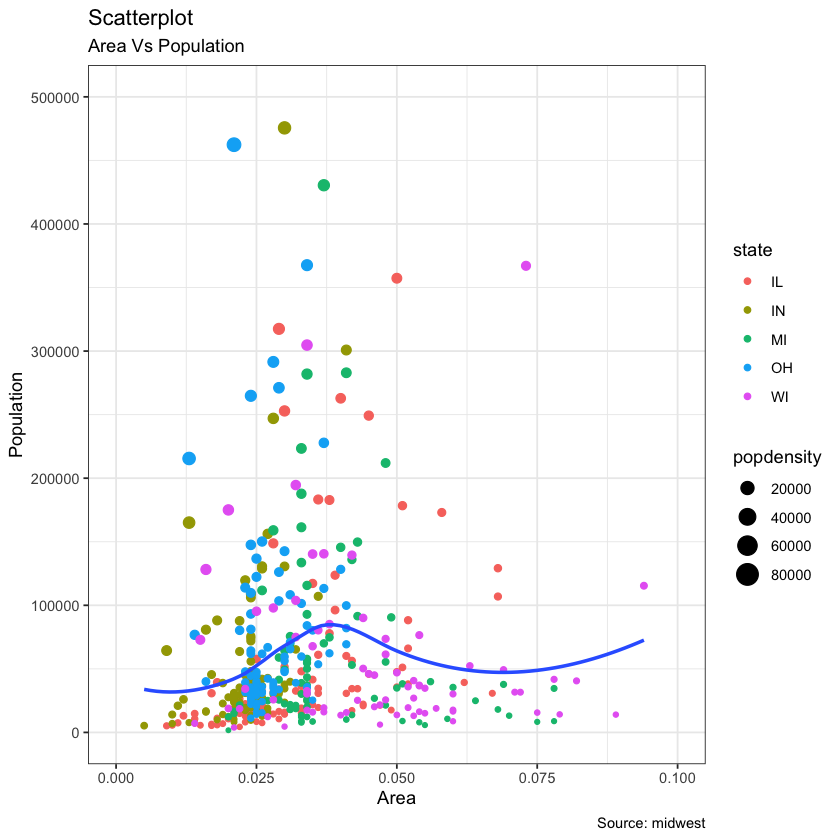

In [174]:
# for making pretty plots
install.packages("tidyverse")
install.packages("ggplot2")
library(tidyverse)
library(ggplot2)

# How to use ggplot2:
# http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html

# load package and data
options(scipen=999)  # turn-off scientific notation like 1e+48
library(ggplot2)
theme_set(theme_bw())  # pre-set the bw theme.
data("midwest", package = "ggplot2")
# midwest <- read.csv("http://goo.gl/G1K41K")  # bkup data source

# Scatterplot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + 
  xlim(c(0, 0.1)) + 
  ylim(c(0, 500000)) + 
  labs(subtitle="Area Vs Population", 
       y="Population", 
       x="Area", 
       title="Scatterplot", 
       caption = "Source: midwest")

plot(gg)
